In [2]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
df = pd.read_table('nyt_data_counts_concat.tsv', header=None, names=['id', 'author_gender', 'year', 'month',
                                                             'sections', 'tags', 'dist_m', 'dist_f',
                                                             'ment_m', 'ment_f', 'quotes_m', 'quotes_f'])
df = df[df['year'] >= 1989]

In [9]:
df.groupby('year').aggregate({
    'quotes_f': {'count': 'count', 'mean': 'mean'},
    'quotes_m': {'count': 'count', 'mean': 'mean'}
    })

quotes_f           quotes_m           
          count      mean    count       mean
year                                         
1989.0     8510  0.000000     8510   0.002468
1990.0     9121  0.490955     9121   1.878412
1991.0     7966  2.638463     7966  10.390409
1992.0     7638  2.932574     7638  10.629877
1993.0     7640  3.151178     7640  10.286126
1994.0     7873  2.836530     7873  11.343071
1995.0    10272  2.799065    10272   8.466998
1996.0     9494  1.677375     9494   5.724563
1997.0     9974  0.000000     9974   0.000000
1998.0     6119  0.000000     6119   0.000000
1999.0    10503  0.000000    10503   0.000190
2000.0    11141  0.006104    11141   0.000000
2001.0    12871  0.000000    12871   0.000000
2002.0    13100  0.000000    13100   0.007176
2003.0    13257  0.000000    13257   0.000000
2004.0    12800  0.004687    12800   0.013984
2005.0    11062  0.008046    11062   0.013108

In [110]:
def display_table(groupedby):
    """
    Take a grouped by object and display summaries of counts, sums and
    ratios across it.
    """
    agg_dict = OrderedDict([('month', {'count': 'count'})] + [
        (col, {'sum': np.sum}) for col in ['dist_m', 'dist_f', 'ment_m', 'ment_f', 'quotes_m', 'quotes_f']])
    agg_table = groupedby.aggregate(agg_dict)
    for counts in ['dist', 'ment', 'quotes']:
        sum_ = agg_table[counts + '_m'] + agg_table[counts + '_f']
        for gend in ['f']:
            agg_table['{}_{}_ratio'.format(counts, gend)] = agg_table[counts + '_' + gend]/sum_
    return agg_table

In [111]:
def plot_ratio_over_time(df, criterion, gender):
    """
    Criterion is something like 'ment', 'dist' or 'quotes'
    gender is 'm' or 'f'.
    This is a plot of how the ratio of that gender's counts
    in criterion have changed over time.
    """
    gender = gender.lower()[0]
    gender_to_string = {
        'm': 'males',
        'f': 'females'
    }
    criterion_to_string = {
        'ment': 'Total mentions',
        'dist': 'Mentions in articles',
        'quotes': 'Quotes'
    }
    gb_y = df.groupby(['year'])
    gb_gend = df.groupby(['author_gender'])
    plot_col = '{}_{}_ratio'.format(criterion, gender)
    agg_table_y = display_table(gb_y)
    ri = agg_table_y.reset_index()
    # plt.gca().xaxis.set_ticklabels([str(a) for a in list(ri['year'])])
    plt.plot(ri['year'], ri[plot_col], label='Total')
    plt.xlabel('Year')
    if criterion == 'quotes':
        plt.ylabel('Fraction of words spoken by women')
    else:
        plt.ylabel('Fraction of {} among {}'.format(gender_to_string[gender], criterion_to_string[criterion]))
    for key, grp in df.groupby(['author_gender']):
        if key not in ['MALE', 'FEMALE']:
            continue
        table = display_table(grp.groupby(['year']))
        ri = table.reset_index()
        plt.plot(ri['year'], ri[plot_col], label = '{} authors'.format(key.title()))
    plt.legend(loc='upper left')

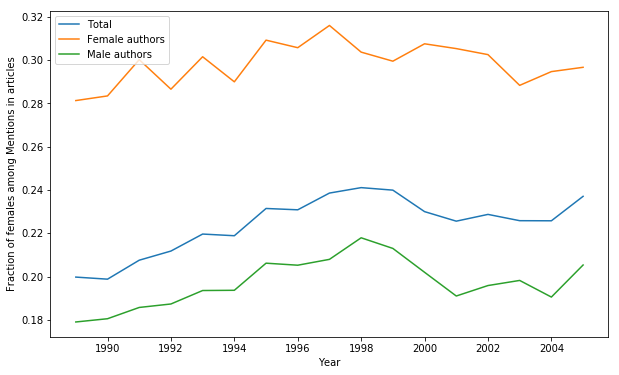

In [112]:
plot_ratio_over_time(df, 'dist', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('Distinct_mentions_over_time.png', dpi=100)

In [ ]:
plot_ratio_over_time(df, 'quotes', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('Quotes_over_time.png', dpi=100)

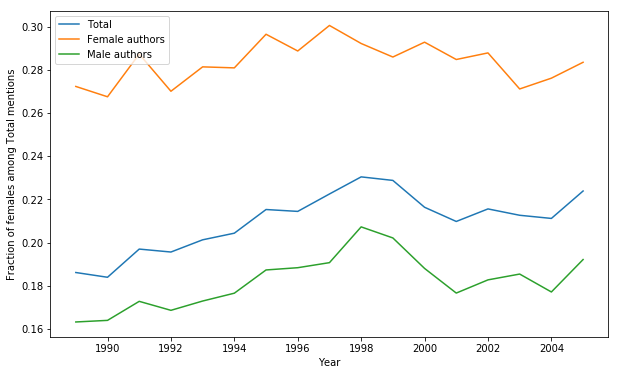

In [113]:
plot_ratio_over_time(df, 'ment', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('total_mentions_over_time.png', dpi=100)

In [114]:
gb_year_gend = df.groupby(['year', 'author_gender']).aggregate({'dist_f': {'count': 'count'}}).reset_index()
ratios = {}
for year in range(1989, 2006):
    gb_year = gb_year_gend[gb_year_gend['year'] == year]
    counts = {}
    for gend in ['FEMALE', 'MALE']:
        counts[gend] = gb_year[gb_year['author_gender'] == gend].iloc[0][2]
    ratios[year] = float(counts['FEMALE'])/(counts['FEMALE'] + counts['MALE'])

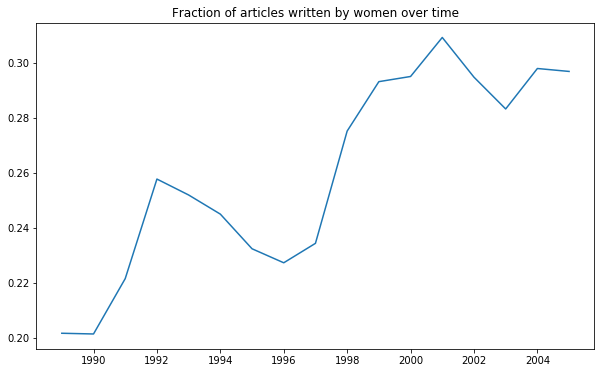

In [116]:
plt.plot(sorted(ratios), [ratios[year] for year in sorted(ratios)])
plt.title('Fraction of articles written by women over time')
plt.gcf().set_size_inches(10, 6)
plt.savefig('Authors_over_time.png', dpi=100)